In [4]:
import re

book_path = r'C:\Users\lucag\Google Drive\Thesis\Datasets\goodreads_maharjan\Drama\failure'

with open (book_path + '\\1496_massacre+at+paris.txt', "r") as myfile:
    full_data=myfile.read()

print(len(full_data))
newline_positions = [match.start() for match in re.finditer("\n", full_data)]

60874


In [5]:
full_data

"\n\n\n\nProduced by An Anonymous Volunteer\n\n\n\n\n\nMASSACRE AT PARIS\n\nBy Christopher Marlowe\n\n\n\n\nTable of Contents with inital stage directions:\n\n\n\n Dramatis Personae\n\n Scene 1: Enter Charles the French King, [Catherine] the Queene\n   Mother, the King of Navarre, the Prince of Condye, the Lord high\n   Admirall, and [Margaret] the Queene of Navarre, with others. Scene 2: Enter the Duke of Guise. Scene 3: Enter the King of Navar and Queen [Margaret], and his\n   [olde] Mother Queen [of Navarre], the Prince of Condy, the\n   Admirall, and the Pothecary with the gloves, and gives them\n   to the olde Queene. Scene 4: Enter [Charles] the King, [Catherine the] Queene\n   Mother, Duke of Guise, Duke Anjoy, Duke Demayne [and Cossin,\n   Captain of the Kings Guard]. Scene 5: Enter Guise, Anjoy, Dumaine, Gonzago, Retes, Montsorrell,\n   and Souldiers to the massacre. Scene 6: Enter Mountsorrell and knocks at Serouns doore. Scene 7: Enter Ramus in his studie. Scene 8: Enter Anj

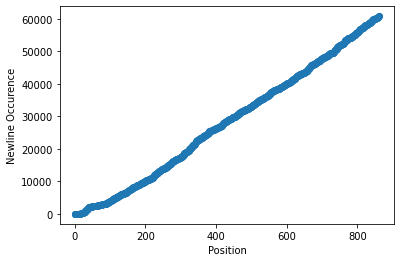

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

plt.scatter([i for i in range(len(newline_positions))], newline_positions)
plt.ylabel('Newline Occurence')
plt.xlabel('Position')
plt.show()

In [7]:
newline_position_diff = [newline_positions[n]-newline_positions[n-1] for n in range(1,len(newline_positions))]

In [8]:
len(newline_position_diff)

862

In [9]:
import numpy as np
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
y_av = movingaverage(newline_position_diff, 5)

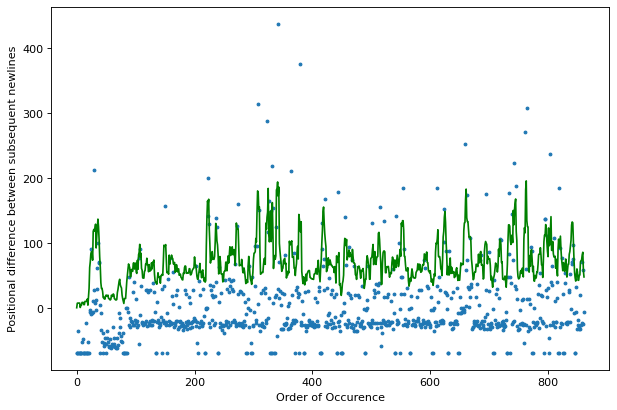

In [26]:
%matplotlib inline

figure(figsize=(9, 6), dpi=80)
plt.plot([i for i in range(len(newline_position_diff))], y_av, 'g-')
plt.scatter([i for i in range(len(newline_position_diff))], newline_position_diff, s = 6)
plt.ylabel('Positional difference between subsequent newlines')
plt.xlabel('Order of Occurence')
plt.show()

In [27]:
newline_positions[23]

224

In [28]:
newline_position_diff = [float(i) for i in newline_position_diff]
newline_position_diff -= np.average(newline_position_diff)

In [29]:
newline_position_diff

array([-69.50696056, -69.50696056, -69.50696056, -35.50696056,
       -69.50696056, -69.50696056, -69.50696056, -69.50696056,
       -69.50696056, -52.50696056, -69.50696056, -47.50696056,
       -69.50696056, -69.50696056, -69.50696056, -69.50696056,
       -22.50696056, -69.50696056, -69.50696056, -69.50696056,
       -51.50696056, -69.50696056,  -6.50696056,  -2.50696056,
        90.49303944,  -8.50696056,  -7.50696056,  10.49303944,
        -6.50696056,  28.49303944, 212.49303944,   8.49303944,
        -2.50696056,  12.49303944,  62.49303944,  29.49303944,
        99.49303944,  69.49303944,  71.49303944,   4.49303944,
       -69.50696056, -33.50696056,  -7.50696056, -51.50696056,
       -38.50696056, -69.50696056, -58.50696056, -53.50696056,
       -46.50696056, -54.50696056, -69.50696056, -35.50696056,
       -45.50696056, -52.50696056, -58.50696056, -60.50696056,
       -60.50696056, -47.50696056, -59.50696056, -61.50696056,
       -54.50696056, -29.50696056, -58.50696056, -54.50

In [30]:
cumsum = np.cumsum(newline_position_diff)

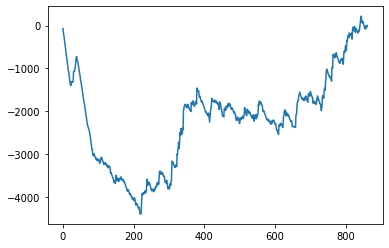

In [31]:
plt.plot(cumsum)

### using https://stackoverflow.com/questions/48000663/step-detection-in-one-dimensional-data

In [32]:
step = np.hstack((np.ones(len(newline_position_diff)), -1*np.ones(len(newline_position_diff))))
newline_position_diff_step = np.convolve(newline_position_diff, step, mode='valid')

In [33]:
step_indx = np.argmax(newline_position_diff_step)

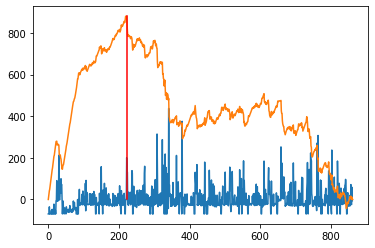

In [34]:
plt.plot(newline_position_diff)

plt.plot(newline_position_diff_step/10)

plt.plot((step_indx, step_indx), (newline_position_diff_step[step_indx]/10, 0), 'r')

In [35]:
newline_positions[200]

10052

In [36]:
data[newline_positions[82]:]

NameError: name 'data' is not defined

In [37]:
import math

What if we use only the first 20% of the data

In [38]:
def find_cutoff(book, percentage):
    figure(figsize=(9, 6), dpi=80)
    
#     with open (book_path, "r") as myfile:
#         book = myfile.read()
    
    data = book[:math.floor(len(book)*percentage)]
    newline_positions = [match.start() for match in re.finditer("\n", data)]
    newline_position_diff = [newline_positions[n]-newline_positions[n-1] for n in range(1,len(newline_positions))]
    newline_position_diff = [float(i) for i in newline_position_diff]
    newline_position_diff -= np.average(newline_position_diff)
    cumsum = np.cumsum(newline_position_diff)
    min_index = np.argmin(cumsum)
    print(min_index)
    plt.axvline(x=min_index, color = 'r')
    plt.plot(cumsum)
    
    return newline_positions[min_index]

85


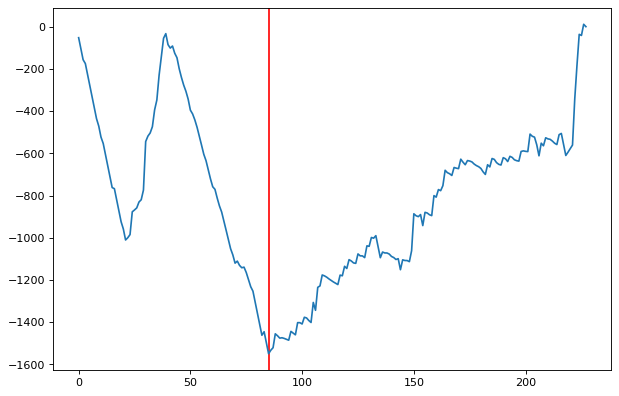

In [39]:
book_path = r'C:\Users\lucag\Google Drive\Thesis\Datasets\goodreads_maharjan\Drama\failure\1496_massacre+at+paris.txt'
with open (book_path, "r") as myfile:
    book = myfile.read()
cutoff = find_cutoff(book, 0.2)

In [97]:
book[cutoff:]

"\n\n        Enter Charles the French King, [Catherine] the Queene Mother,\n        the King of Navarre, the Prince of Condye, the Lord high\n        Admirall, and [Margaret] the Queene of Navarre, with others. CHARLES. Prince of Navarre my honourable brother,\n   Prince Condy, and my good Lord Admirall,\n   wishe this union and religious league,\n   Knit in these hands, thus joyn'd in nuptiall rites,\n   May not desolve, till death desolve our lives,\n   And that the native sparkes of princely love,\n   That kindled first this motion in our hearts,\n   May still be feweld in our progenye. NAVAREE. The many favours which your grace has showne,\n   From time to time, but specially in this,\n   Shall binde me ever to your highnes will,\n   In what Queen Mother or your grace commands. QUEENE MOTHER. Thanks sonne Navarre, you see we love you well,\n   That linke you in mariage with our daughter heer:\n   And as you know, our difference in Religion\n   Might be a meanes to crosse you in you

32


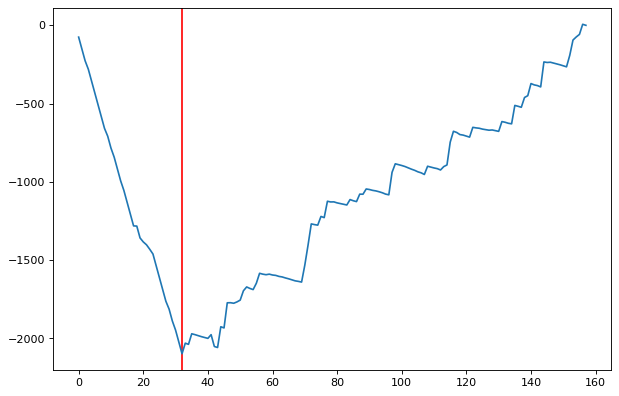

In [98]:
in_shadows_of_the_glen = r'C:\Users\lucag\Documents\Work\Thesis\datasets\goodreads_maharjan\Drama\failure\1618_in+shadow+of+the+glen.txt'
with open (in_shadows_of_the_glen, "r") as myfile:
    book = myfile.read()
cutoff = find_cutoff(book, 0.2)

In [99]:
book[cutoff:]

'\n\nSCENE.--{The last cottage at the head of a long glen in County Wicklow. Cottage kitchen; turf fire on the right; a bed near it against the wall\nwith a body lying on it covered with a sheet. A door is at the other\nend of the room, with a low table near it, and stools, or wooden chairs. There are a couple of glasses on the table, and a bottle of whisky, as\nif for a wake, with two cups, a teapot, and a home-made cake. There is\nanother small door near the bed. Nora Burke is moving about the room,\nsettling a few things, and lighting candles on the table, looking now\nand then at the bed with an uneasy look. Some one knocks softly at the\ndoor. She takes up a stocking with money from the table and puts it in\nher pocket. Then she opens the door.} TRAMP {Outside.} Good evening to you, lady of the house. NORA\n\nGood evening, kindly stranger, it\'s a wild night, God help you, to be\nout in the rain falling. TRAMP It is, surely, and I walking to Brittas from the Aughrim fair. NORA Is 

20


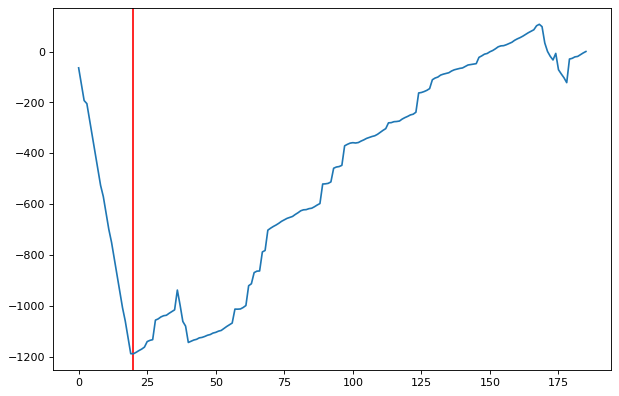

In [100]:
in_shadows_of_the_glen = r'C:\Users\lucag\Documents\Work\Thesis\datasets\goodreads_maharjan\Drama\failure\4039_volpone+or+the+fox.txt'
with open (in_shadows_of_the_glen, "r") as myfile:
    book = myfile.read()
cutoff = find_cutoff(book, 0.2)

In [101]:
book[cutoff:]

'\nThe greatest of English dramatists except Shakespeare, the first\nliterary dictator and poet-laureate, a writer of verse, prose, satire,\nand criticism who most potently of all the men of his time affected the\nsubsequent course of English letters: such was Ben Jonson, and as such\nhis strong personality assumes an interest to us almost unparalleled, at\nleast in his age. Ben Jonson came of the stock that was centuries after to give to the\nworld Thomas Carlyle; for Jonson\'s grandfather was of Annandale, over\nthe Solway, whence he migrated to England. Jonson\'s father lost his\nestate under Queen Mary, "having been cast into prison and forfeited." He entered the church, but died a month before his illustrious son was\nborn, leaving his widow and child in poverty. Jonson\'s birthplace was\nWestminster, and the time of his birth early in 1573. He was thus nearly\nten years Shakespeare\'s junior, and less well off, if a trifle better\nborn. But Jonson did not profit even by this slig

69


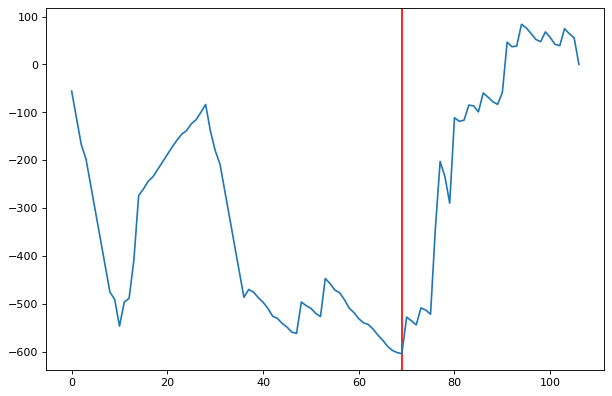

In [117]:
the_jew_of_malta = r'C:\Users\lucag\Documents\Work\Thesis\datasets\goodreads_maharjan\Drama\success\901_the+jew+of+malta.txt'
with open (the_jew_of_malta, "r") as myfile:
    book = myfile.read()
cutoff = find_cutoff(book, 0.1)

In [118]:
book[cutoff:]

"\n     To prove his best, and, if none here gainsay it,\n     The part he hath studied, and intends to play it. EPILOGUE TO THE STAGE, AT THE COCK-PIT. In graving with Pygmalion to contend,\n     Or painting with Apelles, doubtless the end\n     Must be disgrace:  our actor did not so,--\n     He only aim'd to go, but not out-go. Nor think that this day any prize was play'd; [9]\n     Here were no bets at all, no wagers laid: [10]\n     All the ambition that his mind doth swell,\n     Is but to hear from you (by me) 'twas well. DRAMATIS PERSONAE. FERNEZE, governor of Malta. LODOWICK, his son. SELIM CALYMATH, son to the Grand Seignior. MARTIN DEL BOSCO, vice-admiral of Spain. MATHIAS, a gentleman. JACOMO,     |\n     BARNARDINE, | friars. BARABAS, a wealthy Jew. ITHAMORE, a slave. PILIA-BORZA, a bully, attendant to BELLAMIRA. Two Merchants. Three Jews. Knights, Bassoes, Officers, Guard, Slaves, Messenger,\n          and Carpenters\n\n     KATHARINE, mother to MATHIAS. ABIGAIL, daughter

30


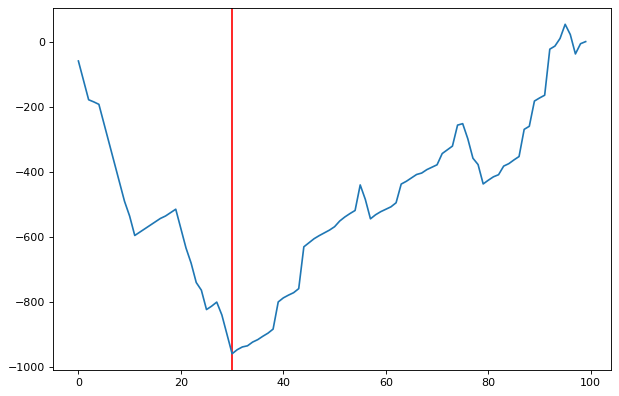

In [13]:
the_frontiersmen = "G:\\My Drive\\Thesis\\Datasets\\goodreads_maharjan\\Science_fiction\\failure\\18641_hunter+patrol.txt"
with open (the_frontiersmen, "r") as myfile:
    book = myfile.read()
cutoff = find_cutoff(book, 0.1)